In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [52]:
import os
import json
import numpy as np
import pickle
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import contextily as cx
import folium
from tqdm import trange, tqdm

from polygon_compare import *

In [62]:
cities = [
    'Ordu',
    # 'Manisa',
    # 'Adana',
    
    # 'Johannesburg',
    # 'Cairo',
    # 'Trabzon',
]

for c in cities:
    city_osm = os.path.join("data","OSM",f"{c}.pkl")
    df_osm = pickle.load(open(city_osm,"rb"))
    df_osm_b = df_osm[df_osm["type"]=="way"]
    
    city_osmb = os.path.join("data","OSMB",f"{c}.pkl")
    df_osmb = pickle.load(open(city_osmb,"rb"))
    df_osmb = df_osmb.set_crs('EPSG:4326')
    
    print(df_osmb.shape)

    df = compare_geodf2(df_osmb, df_osm_b, match_one=True)
    # df.plot()
    # df.to_pickle(f'{c}_combined_osm.pkl')

(1999, 11)


201it [00:14, 14.35it/s]9 [00:14<02:02, 14.63it/s]
 10%|█         | 202/1999 [00:14<02:04, 14.42it/s]
0it [00:00, ?it/s]/1930 [00:00<05:03,  6.36it/s]
  0%|          | 1/1930 [00:00<05:05,  6.32it/s]


In [16]:
df_osmb

,geometry,orient,height,type,levels,name,roofMaterial,roofShape,roofDirection,roofColor,building
0,"POLYGON ((37.85878 41.01506, 37.85899 41.01504...",57.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"POLYGON ((37.85890 41.01424, 37.85909 41.01425...",125.0,3,religious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"POLYGON ((37.86598 41.00785, 37.86606 41.00783...",52.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"POLYGON ((37.86601 41.00637, 37.86608 41.00655...",67.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"POLYGON ((37.86603 41.00742, 37.86629 41.00742...",41.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1994,"POLYGON ((37.99205 40.93531, 37.99206 40.93547...",NaN,3,religious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,"POLYGON ((37.99954 40.93157, 37.99953 40.93142...",NaN,3,religious,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,"POLYGON ((38.00820 40.97672, 38.00820 40.97679...",NaN,3,roof,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,"POLYGON ((38.01762 40.97604, 38.01778 40.97605...",NaN,3,religious,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
len(df_osm_b)

1930

In [50]:
geopandas.clip(df_osm_b, df_osmb.iloc[2]["geometry"]).index.to_list()

[11371]

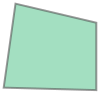

In [36]:
df_osm_b.loc[11371]["geometry"]

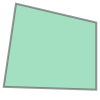

In [30]:
df_osmb.iloc[2]["geometry"]